# OpenAI Gym's Taxi V2 task

# Reference: https://gym.openai.com/envs/Taxi-v2/
    
The Taxi Problem
from "Hierarchical Reinforcement Learning with the MAXQ Value Function Decomposition"
by Tom Dietterich

Description:
There are four designated locations in the grid world indicated by R(ed), B(lue), G(reen), and Y(ellow). When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drive to the passenger's location, pick up the passenger, drive to the passenger's destination (another one of the four specified locations), and then drop off the passenger. Once the passenger is dropped off, the episode ends.
Observations: 
There are 500 discrete actions since there are 25 taxi positions, 5 possible locations of the passenger (including the case when the passenger is the taxi), and 4 destination locations. 

Actions: 
There are 6 discrete deterministic actions:
- 0: move south
- 1: move north
- 2: move east 
- 3: move west 
- 4: pickup passenger
- 5: dropoff passenger

Rewards: 
There is a reward of -1 for each action and an additional reward of +20 for delievering the passenger. There is a reward of -10 for executing actions "pickup" and "dropoff" illegally.

Rendering:
- blue: passenger
- magenta: destination
- yellow: empty taxi
- green: full taxi
- other letters: locations
    

# Part 0: Explore the Env

In [1]:
import gym
env = gym.make('Taxi-v2')

In [2]:
print(env.action_space)
print(env.observation_space)

Discrete(6)
Discrete(500)


In [3]:
import numpy as np
import sys
import math
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
def q_learning(env, agent, num_episodes):
    # monitoring
    plot_every = 100
    tmp_scores = deque(maxlen=plot_every)
    scores = deque(maxlen=num_episodes)
    epsilon = 1.0
    epsilonDecay = 0.999
    best_avg_reward = -math.inf
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        
        ep1 = 1.0/((i_episode/100)+1)
        epsilon = np.max([ep1, 0.005])
        score = 0
        state = env.reset()
        while True:
            action = agent.select_action(state, epsilon)
            next_state, reward, done, info = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            
            if done:
                # append score
                tmp_scores.append(score)
                scores.append(score)
                break
                
        if (i_episode >= 100):
            if np.mean(tmp_scores) > best_avg_reward:
                best_avg_reward = np.mean(tmp_scores)        
        print("\rEpisode {}/{} || Best average reward {}".format(i_episode, num_episodes, best_avg_reward), end="")
        sys.stdout.flush()

        # check if task is solved (according to OpenAI Gym)
        if np.mean(tmp_scores) >= 9.7:
            print('\nEnvironment solved in {} episodes.'.format(i_episode), end="")
            break
    
    return scores

Episode 20000/20000 || Best average reward 7.627

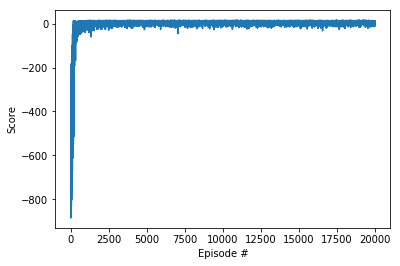

In [32]:
from agent import Agent

agent = Agent(6, 0.9, 0.9)
scores = q_learning(env, agent, 20000)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()